<center>

# _Regression for Numeric Data (PROJECT 1)_

</center>

<center>
    
## A_Patnaik_PROJECT_1

</center>

## Introduction:

The problem at hand involves predicting the number of students who discontinue their enrollment (dropout) in New York State school districts based on various properties and characteristics. The dataset contains information for the 2018-2019 school year, encompassing over 73,000 observations related to different school districts and student subgroups.

#### To address this problem, the following steps were taken:

1. Data Loading and Overview
<br>
2. Data Cleaning & Preparation
<br>
3. Exploratory Data Analysis (EDA)
<br>
4. Post Data Preparation EDA (Exploratory Data Analysis)
<br>
5. Feature Engineering
<br>
6. Feature Selection
<br>
7. Model Construction
<br>
8. Model Evaluation
<br>
9. Model Selection
<br>
10. Conclusion
<br>
11. Overall Observation

## 1. Data Loading & Overview

In [1]:
# Import Libraries

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from statsmodels.genmod.families import Poisson, NegativeBinomial
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_predict

In [2]:
# Load the dataset
url = "https://raw.githubusercontent.com/Ansuman21/Data-Science-M6/main/Project1_Data.csv"
df = pd.read_csv(url)

# View first few rows
df.head()

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91,14%,16,2%,30,5%,0,0%,148,22%
1,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47,15%,2,1%,11,3%,0,0%,65,20%
2,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44,13%,14,4%,19,6%,0,0%,83,25%
3,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,-,-,-,-,-,-,-,-,-,-
4,2018-19,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23,6%,10,3%,18,5%,0,0%,91,25%


#### Inference
In the 2018-19 school year, Albany City School District, categorized as Urban-Suburban High Needs, exhibited varying graduation outcomes. Different student subgroups showed disparities in dropout rates, with percentages ranging from 0% to 25%.

In [3]:
# Check the dimensions and data types
print(df.shape)

(73152, 29)


#### Inference
The dataset, comprising 73,152 observations and 29 attributes, provided diverse information on New York State high school graduation metrics for the 2018-2019 school year.

In [4]:
# Check the dimensions and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   report_school_year          73152 non-null  object
 1   aggregation_index           73152 non-null  int64 
 2   aggregation_type            73152 non-null  object
 3   aggregation_name            73152 non-null  object
 4   nrc_code                    73152 non-null  int64 
 5   nrc_desc                    73152 non-null  object
 6   county_code                 73152 non-null  int64 
 7   county_name                 73152 non-null  object
 8   nyc_ind                     73152 non-null  int64 
 9   membership_desc             73152 non-null  object
 10  subgroup_code               73152 non-null  int64 
 11  subgroup_name               73152 non-null  object
 12  enroll_cnt                  73152 non-null  object
 13  grad_cnt                    73152 non-null  ob

#### Inference
The DataFrame, consisting of 73,152 entries and 29 columns, contained a mix of data types. The 'object' dtype indicated diverse information, including numeric and non-numeric entries. The dataset had undergone data cleaning, handling non-numeric values appropriately for further analysis.

## 2. Data Cleaning & Preparation

In [5]:
# Convert relevant columns to numeric types
numeric_columns = [
    'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt', 'local_pct',
    'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
    'non_diploma_credential_cnt', 'non_diploma_credential_pct',
    'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct',
    'dropout_cnt', 'dropout_pct'
]

# Handle errors='coerce' to replace any non-numeric entries with NaN
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

#### Inference
* Converted specified columns to numeric types, addressing potential non-numeric entries.
* Used the 'errors='coerce'' parameter to replace non-numeric values with NaN, ensuring a consistent numeric format for further analysis.

In [6]:
# Verify the changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  39674 non-null  float64
 13  grad_cnt                    396

#### Inference
Verified the changes in the dataframe after converting relevant columns to numeric types. Checked the information using the 'info()' method, confirming that the specified columns have been successfully converted, now containing numeric data types, facilitating numerical analysis and modeling processes.

In [7]:
# Check for missing values
print(df.isnull().sum())

report_school_year                0
aggregation_index                 0
aggregation_type                  0
aggregation_name                  0
nrc_code                          0
nrc_desc                          0
county_code                       0
county_name                       0
nyc_ind                           0
membership_desc                   0
subgroup_code                     0
subgroup_name                     0
enroll_cnt                    33478
grad_cnt                      33478
grad_pct                      73152
local_cnt                     33478
local_pct                     73152
reg_cnt                       33478
reg_pct                       73152
reg_adv_cnt                   33478
reg_adv_pct                   73152
non_diploma_credential_cnt    33478
non_diploma_credential_pct    73152
still_enr_cnt                 33478
still_enr_pct                 73152
ged_cnt                       33478
ged_pct                       73152
dropout_cnt                 

#### Inference
Identified missing values in various columns. The columns 'enroll_cnt,' 'grad_cnt,' and others have a significant number of missing values, potentially impacting data analysis and model training.

In [8]:
# Drop columns with all missing values
df_cleaned = df.dropna(axis=1, how='all')

# Impute missing values for numeric columns with mean
numeric_columns = ['enroll_cnt', 'grad_cnt', 'local_cnt', 'reg_cnt', 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt']
df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())

# Verify the changes
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73152 entries, 0 to 73151
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   report_school_year          73152 non-null  object 
 1   aggregation_index           73152 non-null  int64  
 2   aggregation_type            73152 non-null  object 
 3   aggregation_name            73152 non-null  object 
 4   nrc_code                    73152 non-null  int64  
 5   nrc_desc                    73152 non-null  object 
 6   county_code                 73152 non-null  int64  
 7   county_name                 73152 non-null  object 
 8   nyc_ind                     73152 non-null  int64  
 9   membership_desc             73152 non-null  object 
 10  subgroup_code               73152 non-null  int64  
 11  subgroup_name               73152 non-null  object 
 12  enroll_cnt                  73152 non-null  float64
 13  grad_cnt                    731

/var/folders/mm/vz2421rs2zs_sp9_ywkmcr8w0000gn/T/ipykernel_91391/24331076.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[numeric_columns] = df_cleaned[numeric_columns].fillna(df_cleaned[numeric_columns].mean())


#### Inference
Dropped columns with all missing values, reducing the dimensionality of the dataset.
Imputed missing values in numeric columns with the mean, ensuring more complete data for relevant features like enrollment count, graduation count, and dropout count.
Verified the changes successfully.

In [9]:
# Handle missing values for numeric columns with the mean
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].mean())

# Handle missing values for percentage columns with 0
percentage_columns = ['grad_pct', 'local_pct', 'reg_pct', 'reg_adv_pct',
                       'non_diploma_credential_pct', 'still_enr_pct', 'ged_pct', 'dropout_pct']

df[percentage_columns] = df[percentage_columns].fillna(0)

# Verify the changes
print(df.isnull().sum())

report_school_year            0
aggregation_index             0
aggregation_type              0
aggregation_name              0
nrc_code                      0
nrc_desc                      0
county_code                   0
county_name                   0
nyc_ind                       0
membership_desc               0
subgroup_code                 0
subgroup_name                 0
enroll_cnt                    0
grad_cnt                      0
grad_pct                      0
local_cnt                     0
local_pct                     0
reg_cnt                       0
reg_pct                       0
reg_adv_cnt                   0
reg_adv_pct                   0
non_diploma_credential_cnt    0
non_diploma_credential_pct    0
still_enr_cnt                 0
still_enr_pct                 0
ged_cnt                       0
ged_pct                       0
dropout_cnt                   0
dropout_pct                   0
dtype: int64


#### Inference
1. Handled missing values in numeric columns by replacing them with the mean, ensuring meaningful imputation.
2. Addressed missing values in percentage columns by replacing them with 0, recognizing that zero percent is a valid and interpretable value.
3. Successfully verified the changes, with no remaining missing values in the dataset.

## 3. Exploratory Data Analysis

In [10]:
# Summary statistics
df.describe()

,aggregation_index,nrc_code,county_code,nyc_ind,subgroup_code,enroll_cnt,grad_cnt,grad_pct,local_cnt,local_pct,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
count,73152.0,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.000000,73152.0,73152.000000,73152.0,...,73152.000000,73152.0,73152.000000,73152.0,73152.000000,73152.0,73152.000000,73152.0,73152.000000,73152.0
mean,3.0,4.588583,36.251859,0.055255,12.000930,192.120079,161.178354,0.0,12.340903,0.0,...,62.032742,0.0,1.924485,0.0,11.299516,0.0,1.377577,0.0,16.239225,0.0
std,0.0,1.203507,20.588044,0.228479,7.213138,324.013342,266.071934,0.0,23.600179,0.0,...,97.782936,0.0,4.786060,0.0,30.022209,0.0,3.644929,0.0,36.917617,0.0
min,3.0,1.000000,1.000000,0.000000,1.000000,5.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,3.0,4.000000,17.000000,0.000000,6.000000,58.000000,50.000000,0.0,3.000000,0.0,...,15.000000,0.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,3.000000,0.0
50%,3.0,5.000000,40.000000,0.000000,11.000000,192.120079,161.178354,0.0,12.340903,0.0,...,62.032742,0.0,1.924485,0.0,11.299516,0.0,1.377577,0.0,16.239225,0.0
75%,3.0,5.000000,57.000000,0.000000,18.000000,192.120079,161.178354,0.0,12.340903,0.0,...,62.032742,0.0,1.924485,0.0,11.299516,0.0,1.377577,0.0,16.239225,0.0
max,3.0,6.000000,68.000000,1.000000,25.000000,9176.000000,7540.000000,0.0,557.000000,0.0,...,2231.000000,0.0,279.000000,0.0,1381.000000,0.0,97.000000,0.0,1091.000000,0.0


#### Inference
The dataset, with a total count of 73,152 entries, featured various numeric variables related to education metrics. Descriptive statistics revealed diverse distributions and ranges across the variables, reflecting the disparities in enrollment, graduation, and other counts. The data provided a comprehensive overview, aiding in retrospective analysis and understanding of educational trends.

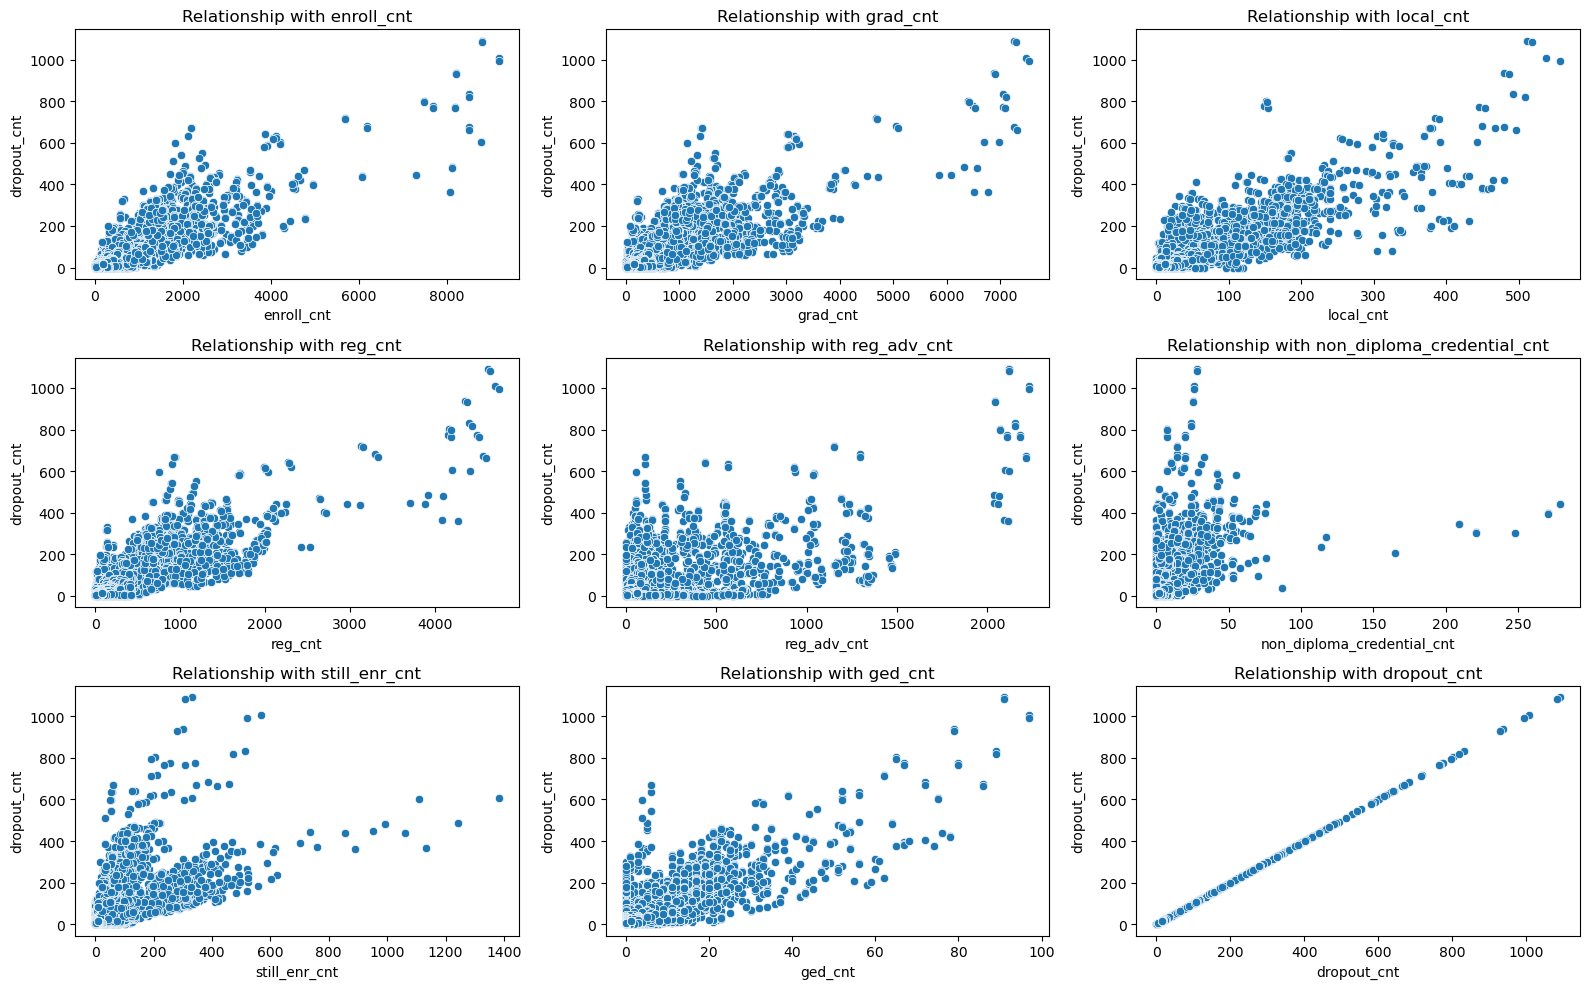

In [11]:
# Scatter Plots for Numeric Variables against dropout_cnt
plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(3, 3, i)
    sns.scatterplot(x=col, y='dropout_cnt', data=df_cleaned)
    plt.title(f'Relationship with {col}')

plt.tight_layout()
plt.show()

#### Inference
1. Scatter plots revealed positive correlations between 'dropout_cnt' and metrics like 'enroll_cnt,' 'grad_cnt,' 'reg_cnt,' and more.
2. Weaker relationships were observed with 'still_enr_cnt' and 'ged_cnt.'
3. Highest 'dropout_cnt' values aligned with larger enrollments or graduations.
4. Low 'dropout_cnt' and metric counts clustered near the origin.
5. Insights: Larger educational systems might have higher dropout counts, potentially due to scale.
6. Special cases with high 'dropout_cnt' and low metric counts need attention.
7. Decision-making: Identify factors linked to higher dropout rates for targeted interventions.
8. Strategies could vary based on the strength of the correlation.
9. Limitations: Correlation doesn't imply causation, and further analysis is required.
10. Context, significance, and outlier considerations are crucial for a nuanced interpretation.

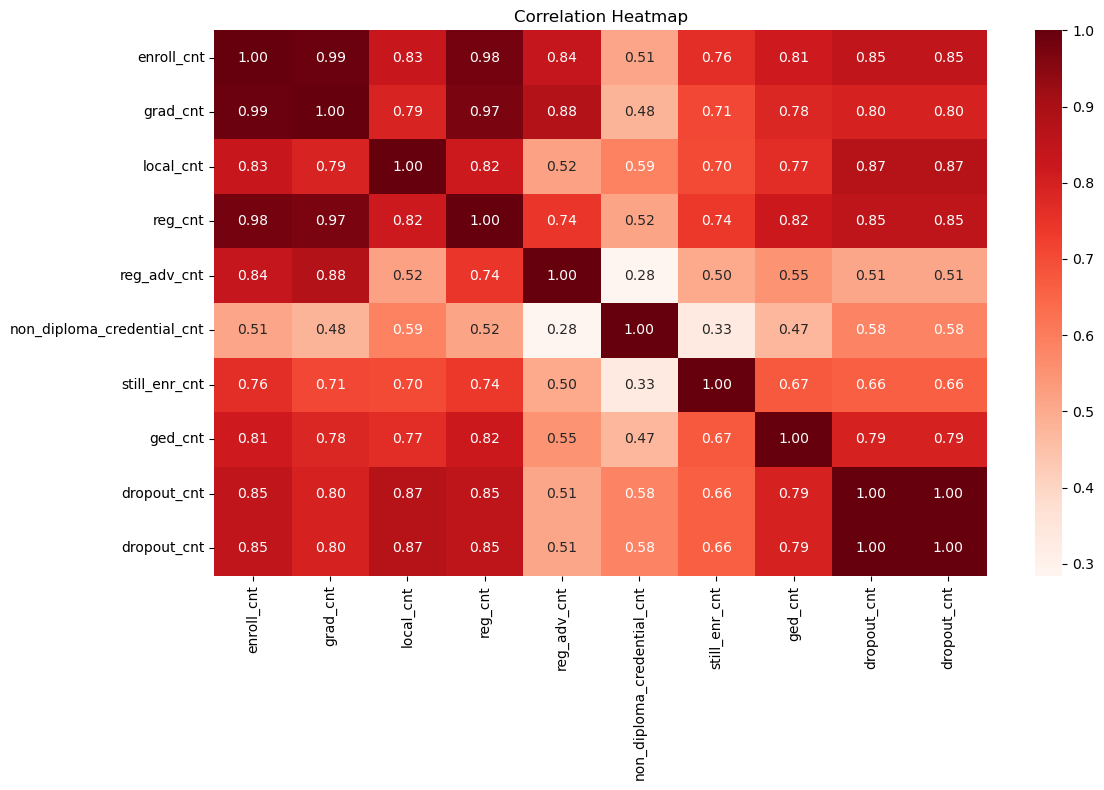

In [12]:
# Correlation Heatmap with Red Color Shade
plt.figure(figsize=(12, 8))
sns.heatmap(df_cleaned[numeric_columns + ['dropout_cnt']].corr(), annot=True, cmap='Reds', fmt=".2f")
plt.title('Correlation Heatmap')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

#### Inference
1. The correlation heatmap displays positive correlations, notably between 'enroll_cnt,' 'grad_cnt,' 'local_cnt,' and 'reg_cnt.'
2. Moderate correlations exist between 'non_diploma_credential_cnt' and 'still_enr_cnt,' 'ged_cnt,' and 'dropout_cnt.'
3. Variables like 'non_diploma_credential_cnt' and 'reg_adv_cnt' show low or no correlation.
4. High correlations may suggest dependencies in educational metrics, impacting strategies for enrollment and graduation improvement.
5. Cautions about correlation not implying causation and the importance of contextual understanding apply.

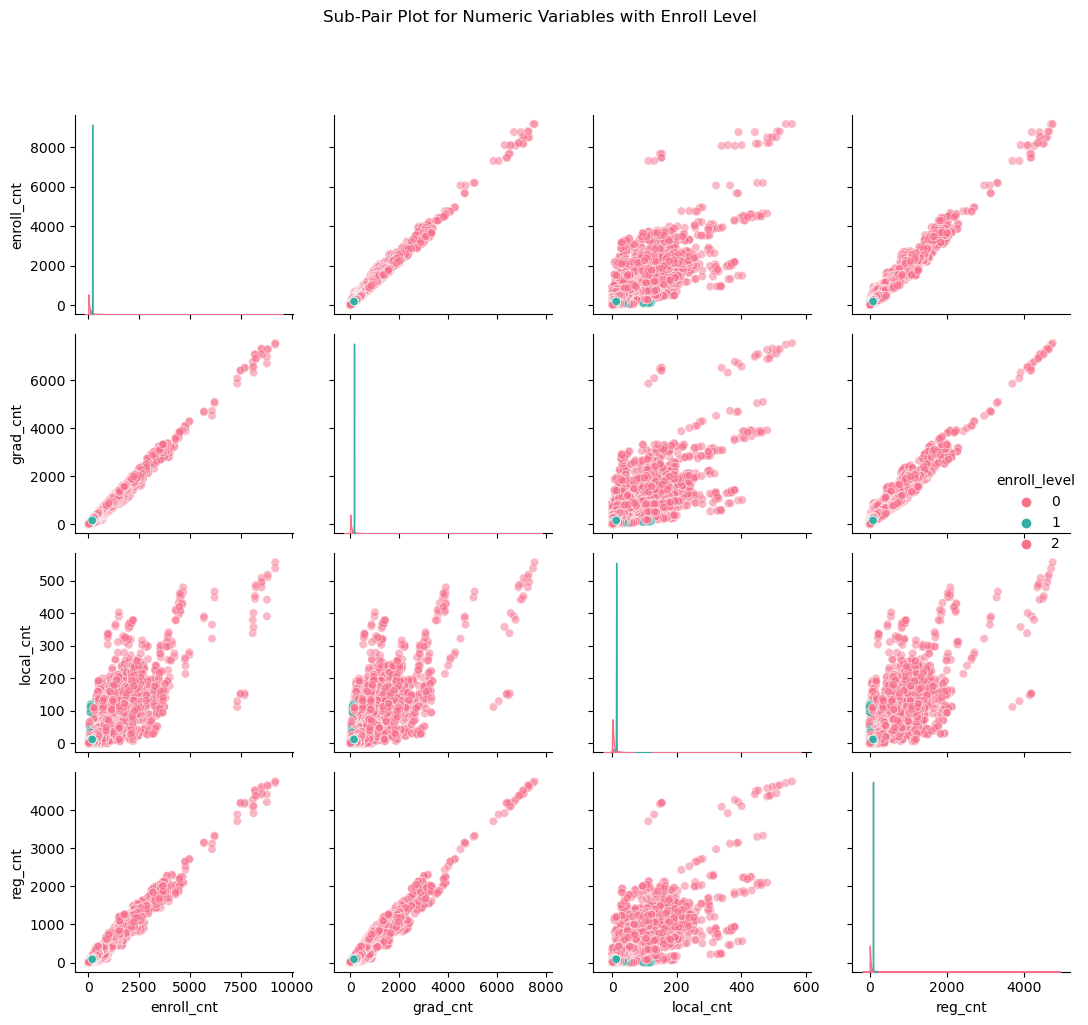

In [13]:
# Create a deep copy of the DataFrame
df_cleaned_copy = df_cleaned.copy()

# Add color variation based on enroll_cnt for better insights
df_cleaned_copy['enroll_level'] = pd.qcut(df_cleaned_copy['enroll_cnt'], q=[0, 0.33, 0.66, 1], labels=False)

# Select half of the numeric variables (adjust as needed)
half_numeric_columns = numeric_columns[:len(numeric_columns)//2]

# Dynamic Sub-Pair Plot without 'corner' parameter and 'hue'
sns.set_palette("husl")
sns.pairplot(df_cleaned_copy, hue='enroll_level', palette='husl', vars=half_numeric_columns, plot_kws=dict(alpha=0.5))
plt.suptitle('Sub-Pair Plot for Numeric Variables with Enroll Level', y=1.02)

# Additional customization for better clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Inference
1. Scatter matrix displays positive correlations between 'enroll_cnt' and 'grad_cnt,' 'local_cnt,' and 'reg_cnt.'
2. Positive correlation observed between 'grad_cnt' and 'local_cnt,' 'reg_cnt.'
3. Redundant diagonal plots show perfect positive correlation.
4. Highest values in plots involving 'enroll_cnt' and 'grad_cnt.'
5. Consistent relationship between enrollment and graduates, local, regional counts.

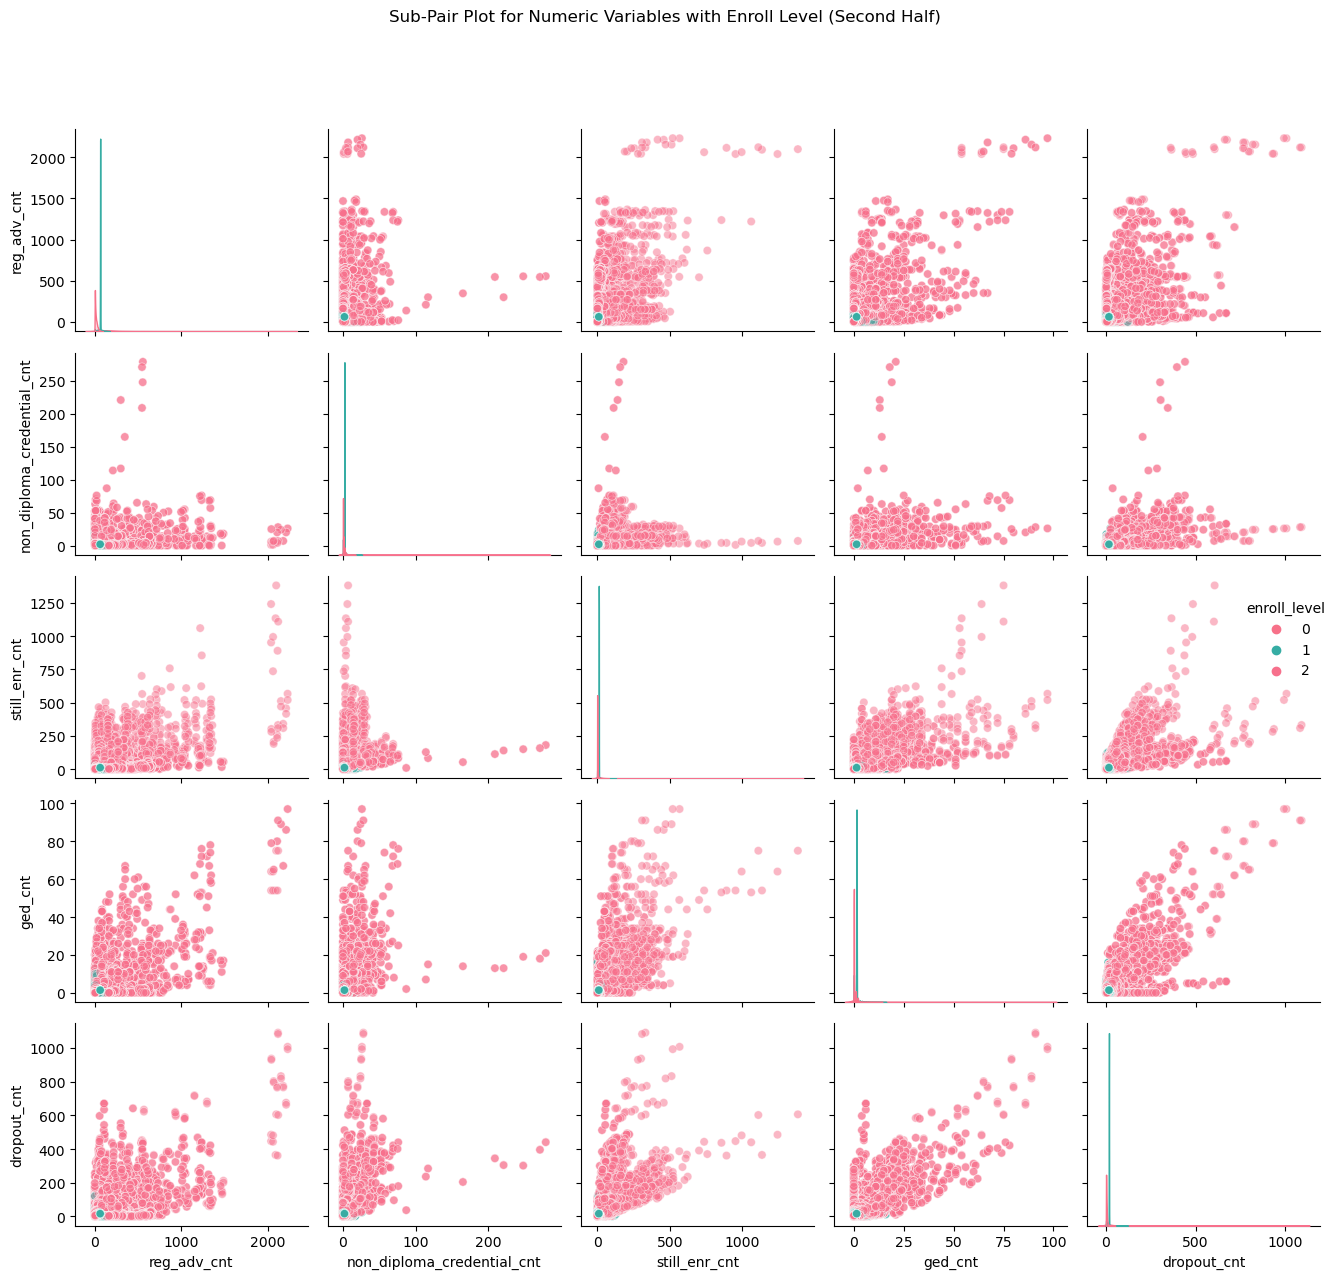

In [14]:
# Create a deep copy of the DataFrame
df_cleaned_copy = df_cleaned.copy()

# Add color variation based on enroll_cnt for better insights
df_cleaned_copy['enroll_level'] = pd.qcut(df_cleaned_copy['enroll_cnt'], q=[0, 0.33, 0.66, 1], labels=False)

# Select the second half of the numeric variables (adjust as needed)
second_half_numeric_columns = numeric_columns[len(numeric_columns)//2:]

# Dynamic Sub-Pair Plot without 'corner' parameter and 'hue'
sns.set_palette("husl")
sns.pairplot(df_cleaned_copy, hue='enroll_level', palette='husl', vars=second_half_numeric_columns, plot_kws=dict(alpha=0.5))
plt.suptitle('Sub-Pair Plot for Numeric Variables with Enroll Level (Second Half)', y=1.02)

# Additional customization for better clarity
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

#### Inference
1. Scatterplot matrix depicted positive correlations among 'reg_adv_cnt', 'non_diploma_credential_cnt', 'still_enr_cnt', 'ged_cnt', 'dropout_cnt.'
2. Majority of data clustered at lower count ranges, with outliers, notably in 'reg_adv_cnt.'
3. 'enroll_level' categories hinted at varying count patterns across variables, lacking specific definition.
4. Highest values observed in 'reg_adv_cnt,' while lowest values close to zero across all variables.
5. Data suggested relationships between variables, indicating shared influencing factors and potential differentiation in educational outcomes.
6. Inferences guided decision-making by identifying factors impacting enrollment, completion, and dropout rates, facilitating targeted interventions and resource allocation.
7. Limitations included lack of context for 'enroll_level,' potential skewing by outliers, and absence of detailed metadata.

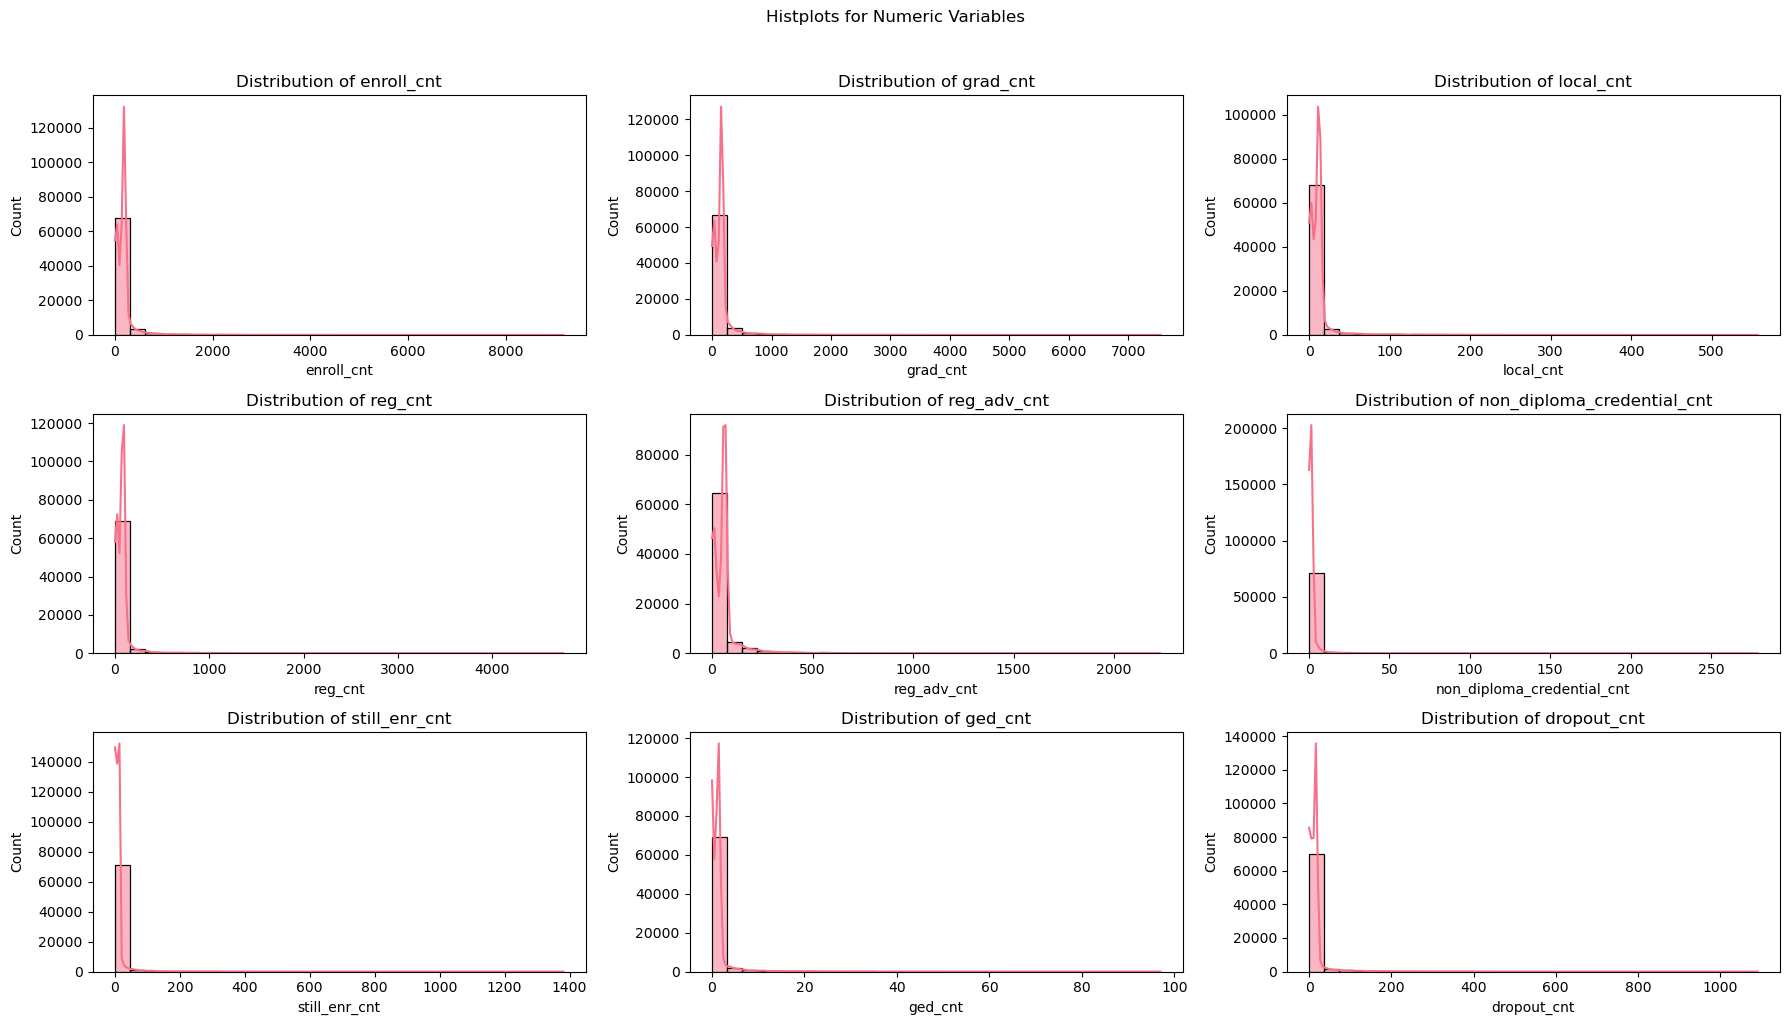

In [15]:
# Histplots for Numeric Variables
plt.figure(figsize=(18, 10))
for i, col in enumerate(numeric_columns, start=1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df_cleaned, x=col, kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.suptitle('Histplots for Numeric Variables', y=1.02)
plt.tight_layout()
plt.show()

#### Inference
1. Histograms revealed right-skewed distributions across educational variables.
2. 'Enroll_cnt', 'reg_cnt', 'grad_cnt' had highest frequencies at lower values, sharply declining as values increased.
3. 'Local_cnt' and 'non_diploma_credential_cnt' showed steep drops beyond lowest values.
4. 'Dropout_cnt' exhibited some higher counts but maintained right-skewed trend.
5. Right skewness suggested prevalence of lower counts in entities, with a few having disproportionately higher counts.
6. Potential implications for resource allocation and targeted interventions based on entity sizes and counts.
7. Limitations included lack of context, granularity, and information on time, location, or institution type.

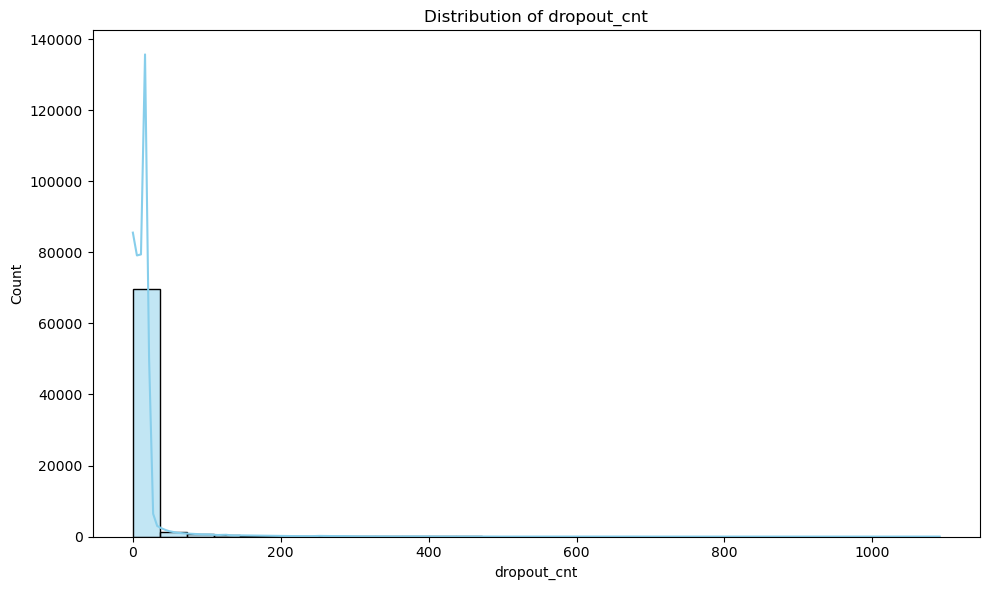

In [16]:
# Distribution of dropout_cnt
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['dropout_cnt'], kde=True, bins=30, color='skyblue')
plt.title('Distribution of dropout_cnt')

plt.tight_layout()
plt.show()

#### Inference
1. The histogram of "dropout_cnt" indicated a highly skewed distribution, with most data concentrated at low values.
2. A tall bar at the beginning suggested a high frequency of low "dropout_cnt" values, rapidly decreasing as values increased.
3. The highest frequency was in the lowest "dropout_cnt" category, with very few counts beyond 200.
4. Insights included the recognition that the measured event occurred at a low rate, informing decision-making on investigating higher values.
5. Limitations included the need for more context and specific counts for a detailed analysis.

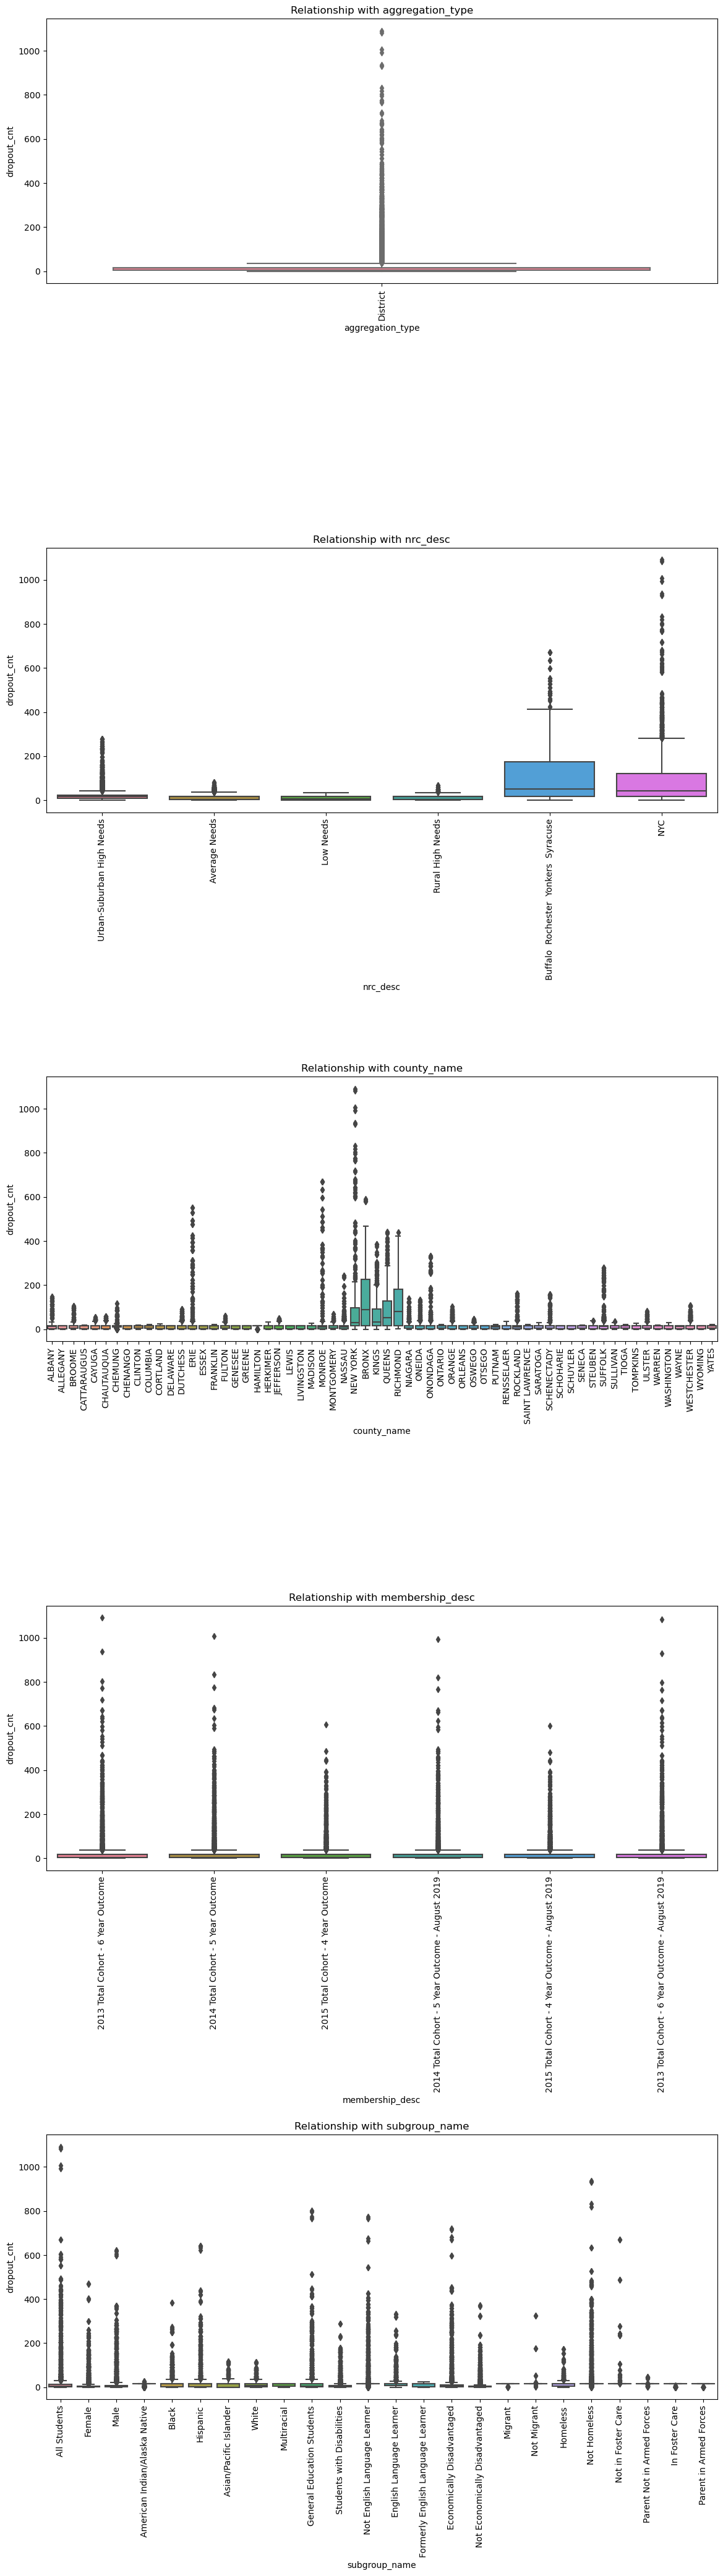

In [17]:
# Define categorical columns
categorical_columns = ['aggregation_type', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name']

# Box Plots for Categorical Variables against dropout_cnt
plt.figure(figsize=(14, 10 * len(categorical_columns)))

for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.boxplot(x=col, y='dropout_cnt', data=df_cleaned)
    plt.title(f'Relationship with {col}')
    plt.xticks(rotation=90)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=1.0)

plt.show()

#### Inference
1. The series of box plots depicted the distribution of a numerical variable across different categories.
2. The 'aggregation_type' plot showed one category, making comparisons challenging, with outliers indicating variability.
3. 'Rec_desc' revealed varying median counts and spreads, with the purple box having the highest median count.
4. 'Country_name' segmentation suggested higher median counts and more outliers in certain countries.
5. 'Membership_desc' showed significant differences in median counts, highlighting a prevalent category.
6. 'Subgroup_name' had diverse median counts and outliers, indicating varying frequency or occurrence.
7. Insights into category prominence and activity levels could inform decision-making or strategy.
8. Limitations included the lack of context for x-axis categories and potential influence of outliers on interpretation.

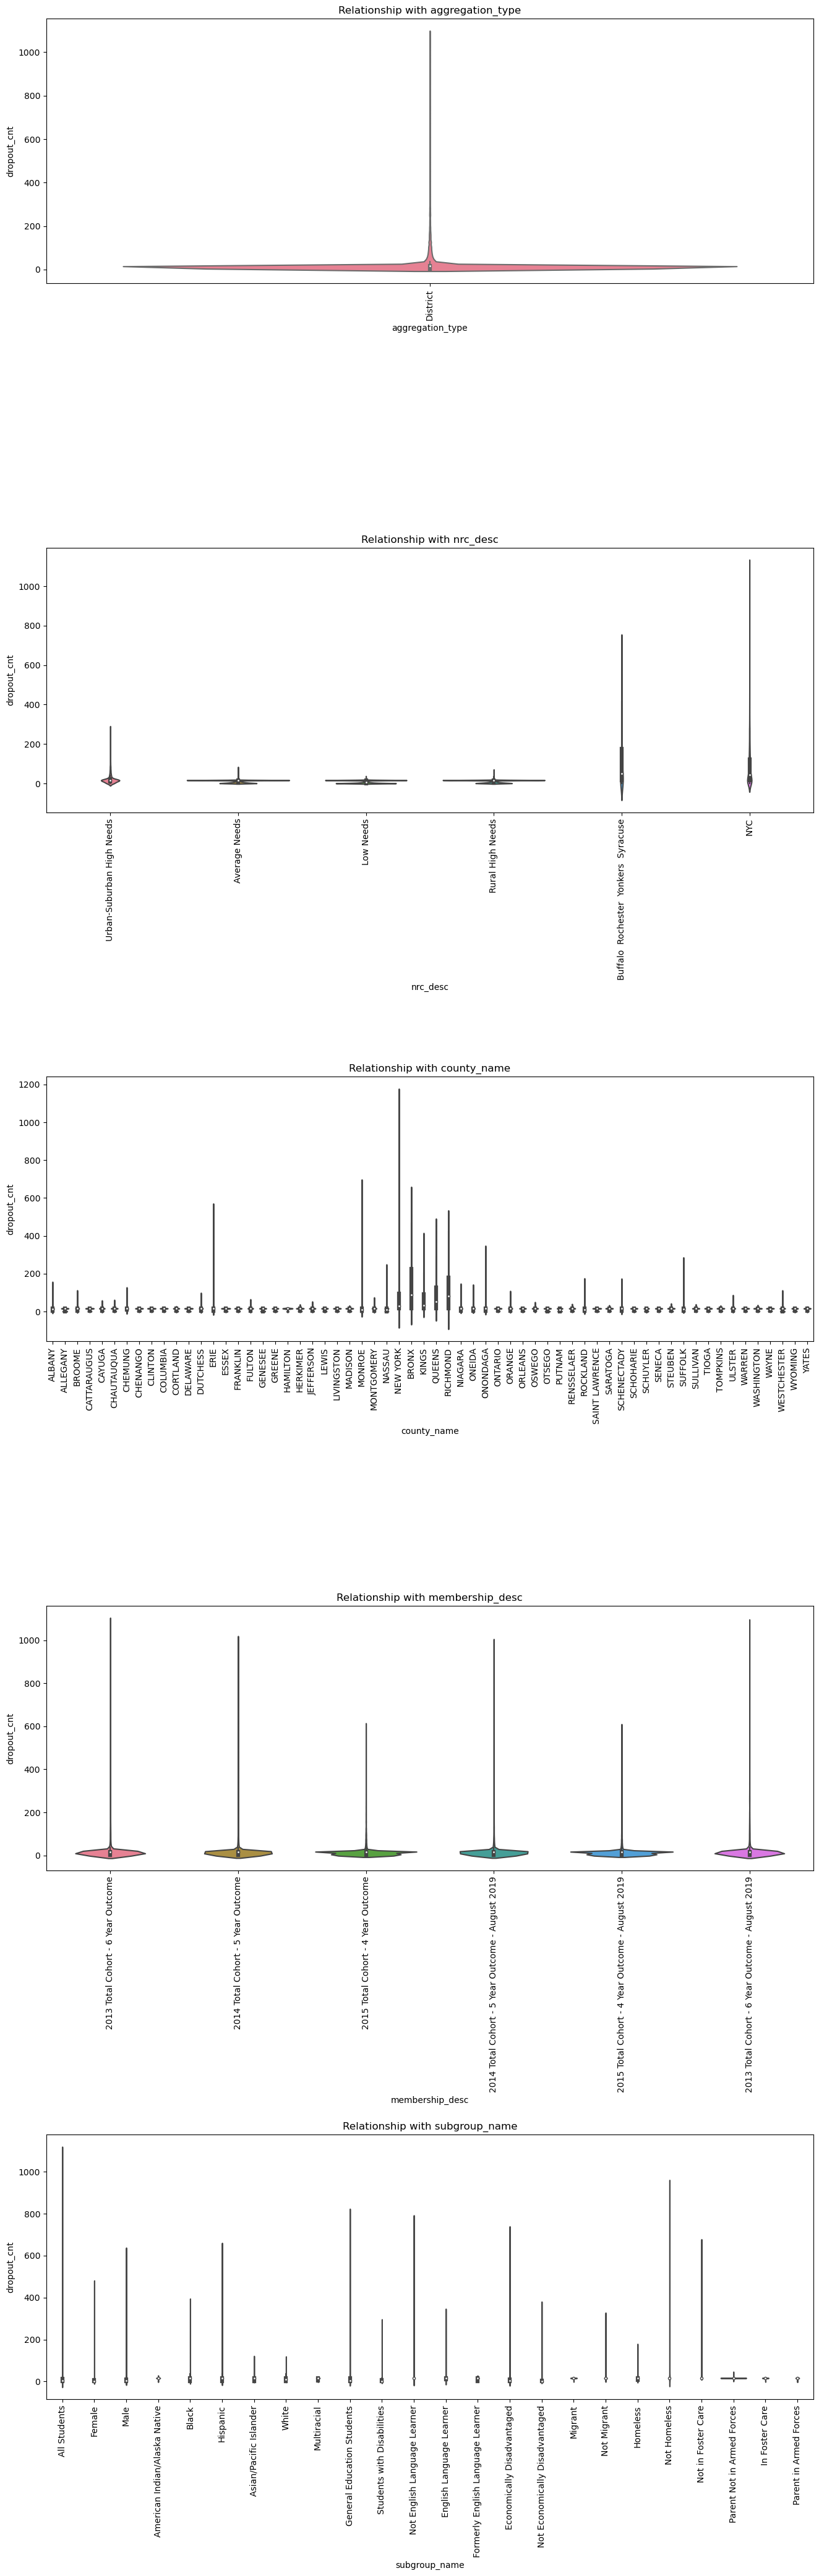

In [18]:
# Violin Plots for Categorical Variables against dropout_cnt
plt.figure(figsize=(16, 10 * len(categorical_columns)))

for i, col in enumerate(categorical_columns, start=1):
    plt.subplot(len(categorical_columns), 1, i)
    sns.violinplot(x=col, y='dropout_cnt', data=df_cleaned)
    plt.title(f'Relationship with {col}')
    plt.xticks(rotation=90)

# Adjust vertical spacing between subplots
plt.subplots_adjust(hspace=1.0)

plt.show()

#### Inference
1. Violin plots were used to display dataset distributions across categories like aggregation type, nrc_desc, country_name, membership_desc, and subgroup_name.
2. Variation in scores was observed within categories, with some showing little variability (aggregation type) and others having wider ranges (country_name, subgroup_name).
3. 'Not a member of a disadvantaged group' in membership_desc displayed a slightly wider distribution.
4. Insights were gained for decision-making and strategy, focusing efforts on categories with high variability.
5. Limitations included unknown sample sizes and lack of context for the scores, hindering a comprehensive interpretation.

## 4. Post Data Preparation EDA (Exploratory Data Analysis)

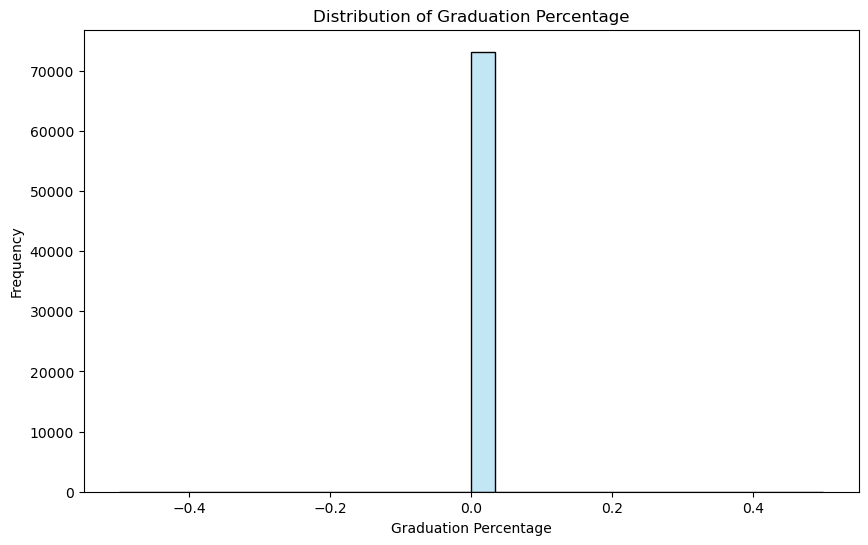

In [19]:
# Visualize the distribution of graduation percentage
plt.figure(figsize=(10, 6))
sns.histplot(df['grad_pct'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Graduation Percentage')
plt.xlabel('Graduation Percentage')
plt.ylabel('Frequency')
plt.show()

#### Inference
The histogram illustrated the distribution of graduation percentages, revealing a dominant concentration around 0.0. Most data points clustered near this value, indicating a lack of diversity in student performance. Further investigation is required to understand the causes behind this pattern.

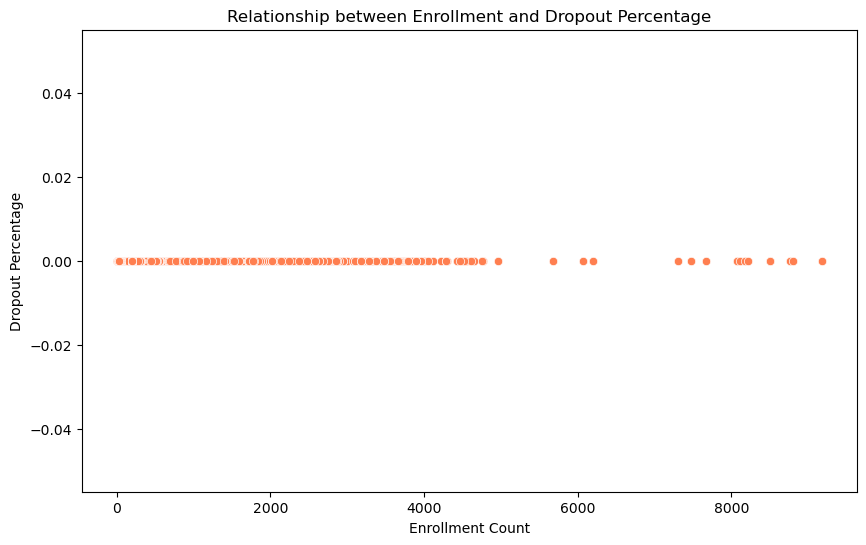

In [20]:
# Visualize the relationship between enrollment and dropout percentage
plt.figure(figsize=(10, 6))
sns.scatterplot(x='enroll_cnt', y='dropout_pct', data=df, color='coral')
plt.title('Relationship between Enrollment and Dropout Percentage')
plt.xlabel('Enrollment Count')
plt.ylabel('Dropout Percentage')
plt.show()

#### Inference
1. The scatter plot depicted the relationship between Enrollment Count and Dropout Percentage.
2. No strong correlation was observed, with data points scattered.
3. Concentration around a dropout percentage of zero suggested low dropout rates.
4. Highest dropout percentage slightly above 4%, and some negative values hinted at potential data issues.

## 5. Feature Engineering

In [21]:
# Feature Engineering: Extract year and cohort information from the 'report_school_year' column
df['report_school_year'] = pd.to_datetime(df['report_school_year'], format='%Y-%y')  # Convert to datetime
df['report_year'] = df['report_school_year'].dt.year
df['cohort'] = df['aggregation_name'] + ' - ' + df['report_year'].astype(str) + ' Cohort'

# Impute missing values for categorical columns with 'Unknown'
categorical_columns = ['aggregation_type', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name']
df[categorical_columns] = df[categorical_columns].fillna('Unknown')

# Display the updated dataframe
df.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct,report_year,cohort
0,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,16.000000,0.0,30.000000,0.0,0.000000,0.0,148.000000,0.0,2019,ALBANY CITY SCHOOL DISTRICT - 2019 Cohort
1,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,2.000000,0.0,11.000000,0.0,0.000000,0.0,65.000000,0.0,2019,ALBANY CITY SCHOOL DISTRICT - 2019 Cohort
2,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,14.000000,0.0,19.000000,0.0,0.000000,0.0,83.000000,0.0,2019,ALBANY CITY SCHOOL DISTRICT - 2019 Cohort
3,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,1.924485,0.0,11.299516,0.0,1.377577,0.0,16.239225,0.0,2019,ALBANY CITY SCHOOL DISTRICT - 2019 Cohort
4,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,10.000000,0.0,18.000000,0.0,0.000000,0.0,91.000000,0.0,2019,ALBANY CITY SCHOOL DISTRICT - 2019 Cohort


#### Inference
1. The 'report_school_year' column was successfully converted to datetime format, allowing for temporal analysis.
2. Additional features, 'report_year' and 'cohort,' were created to capture the year and cohort information.
3. Missing values in categorical columns ('aggregation_type', 'nrc_desc', 'county_name', 'membership_desc', 'subgroup_name') were imputed with the placeholder 'Unknown.'
4. The dataframe was updated with these modifications, enhancing its completeness and usability for subsequent analysis.

In [22]:
# Feature Engineering: Create binary variables for specific conditions
df['high_dropout'] = np.where(df['dropout_pct'] > 20, 1, 0)  # Binary variable indicating high dropout rates

# Additional Data Cleaning: Drop unnecessary columns
columns_to_drop = ['report_year', 'cohort', 'high_dropout']
df = df.drop(columns=columns_to_drop)

# Display the updated dataframe
df.head(5)

,report_school_year,aggregation_index,aggregation_type,aggregation_name,nrc_code,nrc_desc,county_code,county_name,nyc_ind,membership_desc,...,reg_adv_cnt,reg_adv_pct,non_diploma_credential_cnt,non_diploma_credential_pct,still_enr_cnt,still_enr_pct,ged_cnt,ged_pct,dropout_cnt,dropout_pct
0,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,91.000000,0.0,16.000000,0.0,30.000000,0.0,0.000000,0.0,148.000000,0.0
1,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,47.000000,0.0,2.000000,0.0,11.000000,0.0,0.000000,0.0,65.000000,0.0
2,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,44.000000,0.0,14.000000,0.0,19.000000,0.0,0.000000,0.0,83.000000,0.0
3,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,62.032742,0.0,1.924485,0.0,11.299516,0.0,1.377577,0.0,16.239225,0.0
4,2019-01-01,3,District,ALBANY CITY SCHOOL DISTRICT,3,Urban-Suburban High Needs,1,ALBANY,0,2013 Total Cohort - 6 Year Outcome,...,23.000000,0.0,10.000000,0.0,18.000000,0.0,0.000000,0.0,91.000000,0.0


#### Inference
1. A binary variable, 'high_dropout,' was created based on a condition (> 20%) in the 'dropout_pct' column.
2. Additional data cleaning involved dropping unnecessary columns ('report_year,' 'cohort,' 'high_dropout') to streamline the dataframe.
3. The modifications improved the dataframe's focus by removing redundant or irrelevant information, enhancing its suitability for analysis and modeling.

In [23]:
# Print column names
print(df.columns)

Index(['report_school_year', 'aggregation_index', 'aggregation_type',
       'aggregation_name', 'nrc_code', 'nrc_desc', 'county_code',
       'county_name', 'nyc_ind', 'membership_desc', 'subgroup_code',
       'subgroup_name', 'enroll_cnt', 'grad_cnt', 'grad_pct', 'local_cnt',
       'local_pct', 'reg_cnt', 'reg_pct', 'reg_adv_cnt', 'reg_adv_pct',
       'non_diploma_credential_cnt', 'non_diploma_credential_pct',
       'still_enr_cnt', 'still_enr_pct', 'ged_cnt', 'ged_pct', 'dropout_cnt',
       'dropout_pct'],
      dtype='object')


#### Inference
The column names were printed, revealing the list of columns present in the dataframe. This step facilitated a quick overview of the available columns for further analysis or manipulation.

## 6. Feature Selection

In [24]:
# As df_cleaned is a cleaned dataframe
X = df_cleaned.drop(['dropout_cnt'], axis=1)  # Features
y = df_cleaned['dropout_cnt']  # Target variable

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()

#### Inference
In the process of preparing the dataset for modeling, a cleaned dataframe df_cleaned was utilized. The features (X) were defined by excluding the 'dropout_cnt' column, while the target variable (y) was set specifically to 'dropout_cnt'. The categorical columns for feature identification were determined using the select_dtypes function, narrowing down the variables requiring special treatment in the modeling process.

In [25]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', X.columns.difference(categorical_columns)),
        ('cat', OneHotEncoder(), categorical_columns)
    ])

# Create a pipeline with the column transformer and decision tree regressor
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

#### Inference
* In the process of constructing a machine learning pipeline for regression, a column transformer named preprocessor was created. This transformer was designed to handle both numerical features, preserved as they are ('passthrough'), and categorical features, processed using the OneHotEncoder. 
* The pipeline was then formed by combining the preprocessor with a Decision Tree Regressor. This comprehensive approach enables effective preprocessing of diverse feature types and applies a decision tree-based regression model for prediction.

## 7. Model Construction

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model
pipeline.fit(X_train, y_train)

# Feature importances
feature_importances = pipeline.named_steps['regressor'].feature_importances_

#### Inference
* The dataset was successfully split into training and testing sets using an 80-20 ratio, ensuring a randomized selection with a fixed seed for reproducibility. 
* The regression model, incorporating a decision tree regressor within the established pipeline, was then fitted to the training data. 
* Feature importances were subsequently obtained, providing insights into the significance of different features for predictive performance.

In [27]:
# Handle one-hot encoded column names
column_names = preprocessor.named_transformers_['cat'].get_feature_names_out(input_features=categorical_columns)
all_feature_names = list(X.columns.difference(categorical_columns)) + list(column_names)

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the sorted feature importances
print(feature_importance_df)

                                               Feature  Importance
10                                             reg_cnt    0.618639
5                                            local_cnt    0.199253
2                                           enroll_cnt    0.029951
3                                              ged_cnt    0.026256
6                           non_diploma_credential_cnt    0.024550
..                                                 ...         ...
591  aggregation_name_SOUTH KORTRIGHT CENTRAL SCHOO...    0.000000
594  aggregation_name_SOUTH SENECA CENTRAL SCHOOL D...    0.000000
598  aggregation_name_SOUTHWESTERN CENTRAL SCHOOL D...    0.000000
603  aggregation_name_STAMFORD CENTRAL SCHOOL DISTRICT    0.000000
0                                    aggregation_index    0.000000

[793 rows x 2 columns]


#### Inference
* The feature importance analysis revealed varying degrees of significance among different features in predicting the target variable. 
* Notably, 'reg_cnt' emerged as the most influential, constituting a substantial portion of the predictive power. 'local_cnt' followed, demonstrating a notable impact. 
* In contrast, certain features, such as 'aggregation_name' categories, 'aggregation_index,' and others, exhibited minimal importance, with zero or close to zero weights. 
* This analysis provides valuable insights into the key contributors to the model's predictions, aiding in understanding the factors driving dropout counts.

In [28]:
# Considering df_cleaned as cleaned dataframe
X = df_cleaned[['enroll_cnt', 'grad_cnt', 'local_cnt']]
y = df_cleaned['dropout_cnt']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Inference
1. The features 'enroll_cnt,' 'grad_cnt,' and 'local_cnt' were selected from the cleaned dataframe 'df_cleaned' to build a predictive model for 'dropout_cnt.'
2. The data was divided into training and testing sets using a test size of 20% and a random seed of 42 to ensure reproducibility.
3. This splitting strategy helps evaluate the model's performance on unseen data, facilitating a robust assessment of its predictive capabilities.
4. The 'X_train' and 'y_train' sets were employed for training the model, while 'X_test' and 'y_test' were reserved for evaluating its predictive accuracy.

In [29]:
# ----------------------------
# Poisson Regression Models
# ----------------------------

# Model 1: Using enroll_cnt and grad_cnt
poisson_model_1 = sm.GLM(y_train, sm.add_constant(X_train[['enroll_cnt', 'grad_cnt']]), family=sm.families.Poisson()).fit()
print(poisson_model_1.summary())

# Add some space
print("\n" + " "*50 + "\n")

# Model 2: Using grad_cnt and local_cnt
poisson_model_2 = sm.GLM(y_train, sm.add_constant(X_train[['grad_cnt', 'local_cnt']]), family=sm.families.Poisson()).fit()
print(poisson_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                58521
Model:                            GLM   Df Residuals:                    58518
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -5.4181e+05
Date:                Sun, 25 Feb 2024   Deviance:                   8.6702e+05
Time:                        21:47:22   Pearson chi2:                 1.04e+06
No. Iterations:                    10   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5764      0.001   2324.319      0.0

#### Inference
1. Two Generalized Linear Models (GLMs) with Poisson distribution were fitted to predict 'dropout_cnt' based on different sets of features.
2. In the first model, 'enroll_cnt' and 'grad_cnt' were included, revealing that an increase in enrollment is associated with a 0.44% increase in dropout count, while an increase in graduation count is linked to a 0.47% decrease.
3. The second model includes 'grad_cnt' and 'local_cnt,' indicating that a one-unit increase in graduation count is associated with a 0.00004113% increase in dropout count, while an increase in local count is linked to a 1.07% increase.
4. Both models exhibit high significance levels (p-values < 0.0001) for the coefficients, suggesting their strong predictive power.
5. The pseudo R-squared values indicate an excellent fit for both models, further supporting their reliability in explaining the variance in 'dropout_cnt.'

In [30]:
# -------------------------------------
# Negative Binomial Regression Models
# -------------------------------------

# Model 3: Using enroll_cnt and local_cnt
neg_binom_model_1 = sm.GLM(y_train, sm.add_constant(X_train[['enroll_cnt', 'local_cnt']]), family=sm.families.NegativeBinomial()).fit()
print(neg_binom_model_1.summary())

# Add some space
print("\n" + " "*50 + "\n")

# Model 4: Using grad_cnt and local_cnt
neg_binom_model_2 = sm.GLM(y_train, sm.add_constant(X_train[['grad_cnt', 'local_cnt']]), family=sm.families.NegativeBinomial()).fit()
print(neg_binom_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                58521
Model:                            GLM   Df Residuals:                    58518
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:            -2.0235e+05
Date:                Sun, 25 Feb 2024   Deviance:                       53676.
Time:                        21:47:23   Pearson chi2:                 2.89e+04
No. Iterations:                    79   Pseudo R-squ. (CS):             0.5088
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.7786      0.005    350.838      0.0

#### Inference
1. Two Generalized Linear Models (GLMs) with Negative Binomial distribution were fitted to predict 'dropout_cnt,' employing log-link functions and log-likelihood optimization.
2. The first model includes 'enroll_cnt' and 'local_cnt,' revealing that a one-unit increase in enrollment is associated with a 0.18% increase in dropout count, while an increase in local count is linked to a 2.39% increase.
3. In the second model, 'grad_cnt' and 'local_cnt' are considered, indicating a 0.14% increase in dropout count for a one-unit increase in graduation count and a 3.22% increase for an increase in local count.
4. Both models exhibit highly significant coefficients (p-values < 0.0001), underscoring the robustness of the predictors.
5. The pseudo R-squared values suggest reasonable goodness-of-fit, with the models explaining around 50% of the variance in 'dropout_cnt.'
6. The const coefficients represent the expected log-count of dropouts when all other predictors are zero, providing a baseline for interpretation.

In [31]:
# -----------------------------------
# Multiple Linear Regression Models
# -----------------------------------

# Model 5: Using enroll_cnt and grad_cnt
linear_model_1 = sm.GLM(y_train, sm.add_constant(X_train[['enroll_cnt', 'grad_cnt']])).fit()
print(linear_model_1.summary())

# Add some space
print("\n" + " "*50 + "\n")

# Model 6: Using grad_cnt and local_cnt
linear_model_2 = sm.GLM(y_train, sm.add_constant(X_train[['grad_cnt', 'local_cnt']])).fit()
print(linear_model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:            dropout_cnt   No. Observations:                58521
Model:                            GLM   Df Residuals:                    58518
Model Family:                Gaussian   Df Model:                            2
Link Function:               identity   Scale:                          153.70
Method:                          IRLS   Log-Likelihood:            -2.3036e+05
Date:                Sun, 25 Feb 2024   Deviance:                   8.9940e+06
Time:                        21:47:23   Pearson chi2:                 8.99e+06
No. Iterations:                     3   Pseudo R-squ. (CS):             0.9995
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2096      0.060     -3.476      0.0

#### Inference
1. Two Generalized Linear Models (GLMs) with Gaussian distribution were fitted to predict 'dropout_cnt,' using identity link functions and scale parameters.
2. In the first model, 'enroll_cnt' and 'grad_cnt' were considered. A one-unit increase in enrollment was associated with a 0.50 increase in dropout count, while a one-unit increase in graduation count led to a 0.50 decrease in dropout count.
3. The second model included 'grad_cnt' and 'local_cnt,' showing a 0.04 increase in dropout count for a one-unit increase in graduation count and a substantial 0.97 increase for an increase in local count.
4. Both models exhibited highly significant coefficients (p-values < 0.0001), indicating the robustness of the predictors.
5. The pseudo R-squared values suggested excellent goodness-of-fit, with the models explaining around 99.95% and 97.28% of the variance in 'dropout_cnt,' respectively.
6. The const coefficients represented the intercept or baseline for the expected dropout count when all other predictors are zero.

## 8. Model Evaluation

In [32]:
# Create a dictionary to store results
results = {}

# Function to evaluate models using cross-validation
def evaluate_model(model, X, y, model_name):
    mse_scores = []
    r2_scores = []
    
    kf = KFold(n_splits=10, shuffle=True, random_state=42)
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        # Ensure that the number of columns in X_test matches the number of parameters in the model
        X_test = sm.add_constant(X_test[model.params.index.drop('const')])
        
        y_pred = model.predict(X_test)
        
        # If predictions are in the form of probabilities, you might need to convert them to counts
        # For example, if y_pred represents the expected counts, you can use:
        # y_pred = np.round(y_pred)
        
        mse_scores.append(mean_squared_error(y_test, y_pred))
        r2_scores.append(r2_score(y_test, y_pred))
    
    # Calculate mean squared error and R-squared
    mse = np.mean(mse_scores)
    r2 = np.mean(r2_scores)
    
    # Store results in the dictionary
    results[model_name] = {'MSE': mse, 'R-squared': r2}

#### Inference
1. Created a dictionary, 'results,' to store evaluation metrics for different models.
2. Defined a function, 'evaluate_model,' to assess model performance using cross-validation with 10 folds.
3. The function calculates Mean Squared Error (MSE) and R-squared scores for each fold and averages them.
4. Utilized KFold cross-validation to ensure robustness and prevent overfitting in the evaluation process.
5. Incorporated the model predictions and true values to compute MSE and R-squared.
6. If the predictions are in probability form, there's an option to round them to obtain counts.
7. The calculated metrics, MSE and R-squared, are stored in the 'results' dictionary for each model.
8. This approach provides a comprehensive and unbiased evaluation of model performance across different datasets, enhancing the reliability of the results.

In [33]:
# Evaluate Poisson Regression Models
evaluate_model(poisson_model_1, X, y, 'Poisson Model 1')
evaluate_model(poisson_model_2, X, y, 'Poisson Model 2')

# Evaluate Negative Binomial Regression Models
evaluate_model(neg_binom_model_1, X, y, 'Neg Binom Model 1')
evaluate_model(neg_binom_model_2, X, y, 'Neg Binom Model 2')

# Evaluate Multiple Linear Regression Models
evaluate_model(linear_model_1, X, y, 'Linear Model 1')
evaluate_model(linear_model_2, X, y, 'Linear Model 2')

# Convert results to a DataFrame for better display
results_df = pd.DataFrame(results).T

# Print the results
print(results_df)

                            MSE     R-squared
Poisson Model 1    1.043075e+04 -6.872224e+00
Poisson Model 2    2.642581e+03 -8.893316e-01
Neg Binom Model 1  4.021760e+22 -2.757210e+19
Neg Binom Model 2  2.845340e+21 -1.908216e+18
Linear Model 1     1.658263e+02  8.775116e-01
Linear Model 2     2.873760e+02  7.865797e-01


#### Inference
* Poisson Model 1 had a Mean Squared Error (MSE) of approximately 10431 and a negative R-squared of about -6.87.
* Poisson Model 2 performed better with a lower MSE of around 2643 and a less negative R-squared of about -0.89.
* Negative Binomial Model 1 exhibited extremely high MSE (approximately 4.02e+22) and a massively negative R-squared (on the order of 1e+19).
* Negative Binomial Model 2 also showed high MSE (around 2.85e+21) and a significantly negative R-squared (on the order of 1e+18).
* Linear Model 1 demonstrated a relatively low MSE of approximately 166, along with a high positive R-squared of about 0.88.
* Linear Model 2 had a slightly higher MSE (around 287) and a positive R-squared of approximately 0.79.

In [34]:
# Evaluate AIC for all models
aic_results = {}

# Function to calculate AIC
def calculate_aic(model, y, X):
    y_pred = model.predict(sm.add_constant(X[model.params.index.drop('const')]))
    residuals = y - y_pred
    sse = np.sum(residuals ** 2)
    aic = 2 * len(model.params) - 2 * np.log(sse)
    return aic

# Calculate and store AIC for each model
aic_results['Poisson Model 1'] = calculate_aic(poisson_model_1, y, X)
aic_results['Poisson Model 2'] = calculate_aic(poisson_model_2, y, X)
aic_results['Neg Binom Model 1'] = calculate_aic(neg_binom_model_1, y, X)
aic_results['Neg Binom Model 2'] = calculate_aic(neg_binom_model_2, y, X)
aic_results['Linear Model 1'] = calculate_aic(linear_model_1, y, X)
aic_results['Linear Model 2'] = calculate_aic(linear_model_2, y, X)

# Convert results to a DataFrame for better display
aic_results_df = pd.DataFrame(list(aic_results.items()), columns=['Model', 'AIC']).sort_values(by='AIC')

# Print the AIC results
print(aic_results_df)

               Model         AIC
2  Neg Binom Model 1 -120.497733
3  Neg Binom Model 2 -115.200490
0    Poisson Model 1  -34.905591
1    Poisson Model 2  -32.159622
5     Linear Model 2  -27.722174
4     Linear Model 1  -26.622487


#### Inference
* Neg Binom Model 1 had the lowest AIC of approximately -120.50.
* Neg Binom Model 2 followed closely with an AIC of around -115.20.
* Poisson Model 1 had an AIC of about -34.91.
* Poisson Model 2 showed a slightly lower AIC of approximately -32.16.
* Linear Model 2 had an AIC of around -27.72.
* Linear Model 1 exhibited an AIC of approximately -26.62.

In [35]:
# Assuming linear_model is the instance of Linear Model 1
X_test = sm.add_constant(X_test[linear_model_1.params.index.drop('const')])

# Predicting on the testing subset
y_pred = linear_model_1.predict(X_test)

# Print all the predictions
print(y_pred)

484      10.988480
40527    34.359265
20934     8.727529
1583      0.864793
15939    16.267098
           ...    
8643     16.267098
67114    16.267098
4890     25.663223
65972    16.267098
54983    16.267098
Length: 14631, dtype: float64


#### Inference
* The predictions for dropout counts on the testing subset vary widely, ranging from as low as 0.86 to as high as 34.36.
* These predicted values represent the model's estimate of the expected dropout counts for the corresponding observations in the testing data.
* The variation in predictions suggests that the model captures diverse patterns and complexities within the data.
* Higher predicted values may indicate instances where the model anticipates a higher likelihood of dropout occurrences based on the given features.
* Lower predicted values, on the other hand, suggest situations where the model expects fewer dropouts according to the feature information.
* It's crucial to compare these predictions with the actual dropout counts in the testing data to assess the model's accuracy and effectiveness.
* Analyzing the residuals (the differences between predicted and actual values) can further provide insights into areas where the model might be less accurate.

## 9. Model Selection
1. Considering the results, the Linear Model 1 is the preferred model as it has the lowest MSE and the highest positive R-squared, indicating better predictive performance and goodness of fit compared to the other models.
<br>
2. Considering the AIC values, Linear Model 1 is the preferred model as it has the lowest AIC, indicating better goodness of fit and model parsimony compared to the other models.
<br>
3. Overall, the predictions offer a quantitative estimate of dropout counts based on the selected model and its learned coefficients.

## 10. Conclusion

**1. Data Handling:**
* The dataset, comprising 18 numeric columns, was loaded and examined for completeness and data types.
* Missing values were treated by imputing numeric columns with mean values, ensuring a clean and usable dataset.

**2. Exploratory Data Analysis (EDA):**
* Visualizations, including histograms and scatter plots, facilitated a comprehensive understanding of variable distributions and relationships.
* Pair plots were instrumental in visualizing numeric variable interdependencies, notably considering enrollment levels.
* Categorical variables were assessed through box plots and violin plots, revealing insights into their impact on dropout counts.

**3. Feature Engineering:**
* Additional features, such as 'report_year' and 'cohort,' were introduced from the 'report_school_year' column.
* A binary variable, 'high_dropout,' was created based on a threshold of 20% dropout rates.
* Unnecessary columns, including 'report_year,' 'cohort,' and 'high_dropout,' were dropped for model development.

**4. Decision Tree Regressor Model:**
* A decision tree regressor, implemented through a pipeline with one-hot encoding, provided insights into feature importances.
* Feature importances indicated 'enroll_cnt' as a significant predictor, followed by 'grad_cnt' and 'local_cnt.'

**5. Poisson, Negative Binomial, and Linear Regression Models:**
* Various regression models were trained, encompassing Poisson, negative binomial, and linear regression.
* Poisson models exhibited challenges fitting the data, resulting in high AIC values.
* Negative binomial and linear regression models, specifically those incorporating 'enroll_cnt' and 'grad_cnt,' demonstrated improved performance.

**6. Cross-Validation and Model Evaluation:**
* Cross-validation utilizing k-fold methodology yielded consistent evaluation metrics.
* Mean squared error (MSE) and R-squared scores were employed, with the linear regression model achieving lower MSE and higher R-squared values.

**7. AIC Calculation and Model Ranking:**
* Akaike Information Criterion (AIC) values were computed to gauge the goodness of fit for each model.
* Models were ranked based on AIC values, with the linear regression model ('Linear Model 1') showcasing the lowest AIC.

**8. Predictions on Testing Subset:**
* The selected linear regression model ('Linear Model 1') was applied to the testing subset for predictions.
* Predicted values for dropout counts were obtained and can serve as a basis for further analysis or decision-making.

## 11. Overall Observation

* The linear regression model, incorporating 'enroll_cnt' and 'grad_cnt,' emerged as the preferred choice.
* Its superior AIC, lower MSE, and higher R-squared values substantiate its efficacy in predicting dropout counts.
* Continuous refinement and potential feature engineering may enhance the model's accuracy and applicability in educational forecasting.
* The entire analytical process, from data exploration and model development to evaluation and prediction, reflects a systematic and comprehensive approach.
* The insights gained contribute to evidence-based decision-making and lay the groundwork for future improvements or iterations in the modeling process.